In [2]:
import pandas as pd

from statsbombpy import sb

import mplsoccer
from mplsoccer import Pitch

import matplotlib
import matplotlib.pyplot as plt

import json
from pandas import json_normalize

In [3]:
sb.competitions()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,22,Europe,Champions League,male,False,False,2010/2011,2022-01-26T21:07:11.033473,2021-06-13T16:17:31.694,None,2022-01-26T21:07:11.033473
9,16,21,Europe,Champions League,male,False,False,2009/2010,2022-11-15T17:26:10.871011,2021-06-13T16:17:31.694,None,2022-11-15T17:26:10.871011


In [4]:
sb.matches(competition_id=43, season_id=106).head(50)

MATCH_ID = 3869354
match_events_df = sb.events(match_id=MATCH_ID)
match_360_df = pd.read_json(f'/Users/Hp Laptop/Documents/GitHub/open-data/data/three-sixty/{MATCH_ID}.json')
#note link to GITHUB JSON

df= pd.merge(left=match_events_df, right =match_360_df, left_on='id', right_on='event_uuid', how='left')

print(df.columns)

#identifying players and player ids
print(df.player_id.unique())
print(df.player.unique())

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_offensive',
       'ball_recovery_recovery_failure', 'block_deflection',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'duel_outcome',
       'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_penalty', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_punched_out', 'goalkeeper_technique', 'goalkeeper_type',
       'id', 'index', 'injury_stoppage_in_chain', 'interception_outcome',
       'location', 'match_id', 'minute', 'off_camera', 'out',
       'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_deflected',
       

In [5]:
Jude_Bellingham = 30714

df = df[df['player_id'] == Jude_Bellingham].reset_index(drop=True)
data = df.to_json(orient='index')

# Use json.loads() to load the JSON string
data_dict = json.loads(data)

# Use pandas.DataFrame.from_dict() to convert the dictionary to DataFrame
df2 = pd.DataFrame.from_dict(data_dict, orient='index')

# Save the DataFrame to a CSV file
#df2.to_csv('C:/Users/Hp Laptop/Desktop/JBWC2022.csv', index=False)

print("Data saved to player_data.csv")

Data saved to player_data.csv


In [6]:
#load csv file - change file path to own device
df1= pd.read_csv('C:/Users/Hp Laptop/Desktop/JBWC2022.csv')

dfJB = df1[(df1['player'] == 'Jude Bellingham')]

<Axes: >

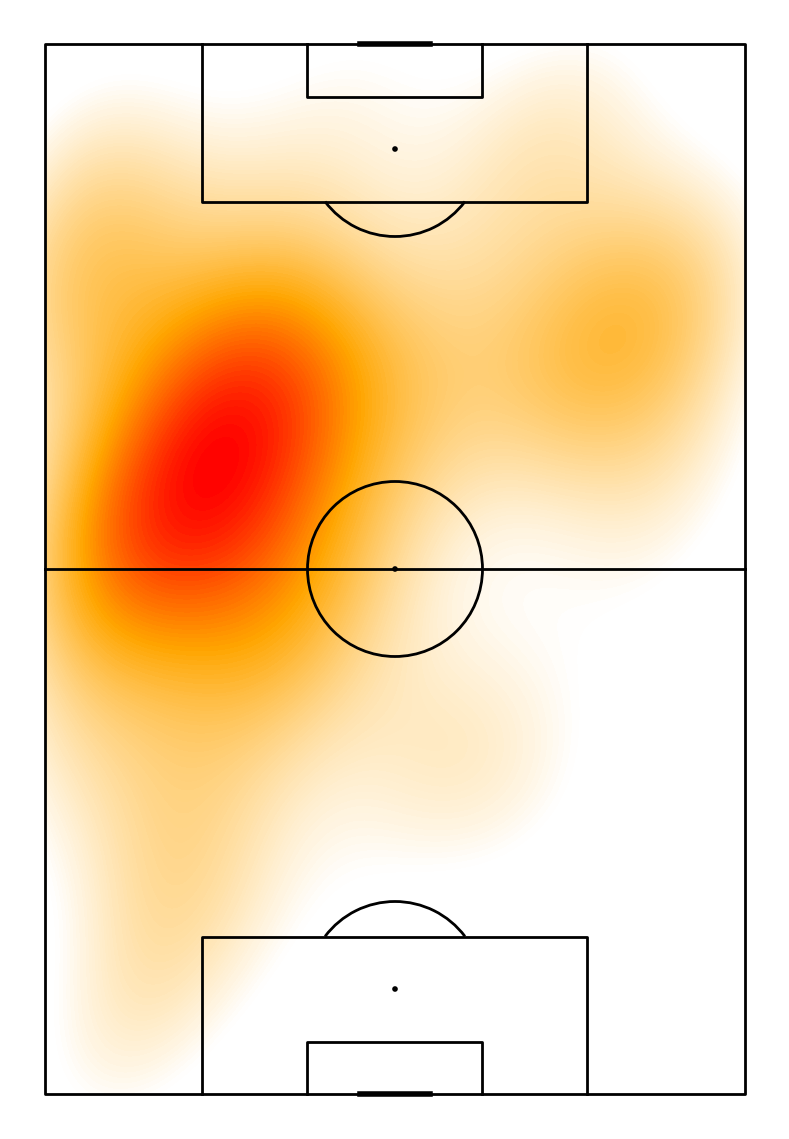

In [7]:
#setting pitch
customcmap = matplotlib.colors.LinearSegmentedColormap.from_list('custom cmap', ['white', 'orange', 'red'])

pitch = mplsoccer.VerticalPitch(pitch_type='statsbomb', pitch_color='white', line_color='black', line_zorder=2)
fig, ax = pitch.draw(figsize=(8, 12))
fig.set_facecolor('white')

pitch.kdeplot(dfJB['location_x'], dfJB['location_y'], ax=ax, cmap=customcmap, fill=True, n_levels=100, zorder=1)

In [8]:
#change file path to own device
#fig.savefig('C:/Users/Hp Laptop/Desktop/JBHMWC2022.png')